# Results
This notebook was a nice try, but the result shows that using a clustering approach to add labels to diffent contexts of words is not the way to go.     

### I build a labeled dataset using clustering

Yes, you can use clustering to create a labeled dataset by leveraging unsupervised techniques. However, the labels generated through clustering might not be as accurate as human-labeled data. Clustering is more appropriate when you have a sense of the possible groups or categories in your data and you want to explore the data's structure.

Here's a general approach to create a labeled dataset using clustering:

**Data Preparation:**
Collect a sizable text dataset that includes examples of the word used in different contexts. These could be sentences or short passages where the word appears.

**Feature Extraction:**
Convert the text data into numerical feature vectors using techniques like TF-IDF, word embeddings (Word2Vec, GloVe), or contextual embeddings (BERT, etc.).

**Clustering:**
Apply a clustering algorithm like K-means, DBSCAN, or hierarchical clustering to group similar examples together. Choose the number of clusters based on your understanding of the different contexts.

**Cluster Inspection:**
Inspect the clusters to identify the most common contexts represented in each cluster. This step requires domain knowledge and might involve reading and understanding the examples in each cluster.

**Assign Labels:**
Manually label the clusters based on your analysis in the previous step. For example, you might label clusters as "Context A" and "Context B" if they correspond to different meanings of the word.

**Generate Labeled Data:**
For each cluster, assign the corresponding label that you've assigned in the previous step to all examples within that cluster. This effectively creates a labeled dataset.

**Validation and Refinement:**
Split your labeled dataset into training and validation sets. You can use the labeled data to train a simple classification model and evaluate its performance. If the results are satisfactory, you can use the labeled data for classification tasks.

Remember that this approach has limitations. Clustering doesn't guarantee perfect separation of contexts, and manual labeling is still crucial for accurate results. The quality of your labeled dataset will largely depend on the quality of your initial clustering and the accuracy of your manual labeling.

While clustering can help you identify patterns and potential labels, for tasks requiring accurate and nuanced classification (such as distinguishing between subtle meanings of a word), manual annotation or supervised learning is often necessary for the best results.


# Data Preparation:
Collect a sizable text dataset that includes examples of the word used in different contexts. These could be sentences or short passages where the word appears.

In [119]:
from pathlib import Path
import re

In [120]:
Path.cwd()

WindowsPath('C:/Users/lakj/Lighting in French Literature/code')

In [121]:
data_dir = Path.cwd() / '../data'
with open(data_dir / 'all_of_balzac.txt', 'r', encoding='utf-8-sig') as f:
    text = f.read().lower()

split_paragraphs = text.split('.')    
list_clean_paragraphs = [' '.join(re.findall(r'\b\S+\b', i)) for i in split_paragraphs]

example_contexts = [i for i in list_clean_paragraphs if 'lumière' in str(i)]

In [122]:
example_contexts

['les boutiques sont fermées celles qui sont ouvertes ont un mauvais caractère c’est un cabaret malpropre et sans lumière une boutique de lingère qui vend de l’eau de cologne',
 'certes les mesures doivent changer avec les temps et celles qui tiennent aux individus et à leur liberté sont délicates mais peut-être devrait-on se montrer large et hardi sur les combinaisons purement matérielles comme l’air la lumière les locaux',
 'à chaque phrase les sanglots croissants les larmes abondantes de la fille au désespoir attestaient la force avec laquelle la lumière entrait à la fois dans son intelligence pure comme celle d’un sauvage dans son âme enfin réveillée dans sa nature sur laquelle la dépravation avait mis une couche de glace boueuse qui fondait alors au soleil de la foi',
 'la dureté de cette physionomie ressortait d’autant mieux qu’elle était encadrée par la sèche perruque du prêtre qui ne se soucie plus de sa personne une perruque pelée et d’un noir rouge à la lumière',
 'sachez-le 

In [123]:
#Feature Extraction using TfIdf 
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(example_contexts)

# Convert the matrix to an array
tfidf_array = tfidf_matrix.toarray()

In [126]:
tfidf_array.shape 

(54, 1028)

Cluster 0: Top Words: elle, dit, est, la, fenêtre, lumière, de, personnel, peyrade, mit, contenson, qui, chose, une, quelque
Cluster 1: Top Words: est, dont, de, ton, être, cela, toi, faire, te, pauvre, la, un, pour, peintres, égale
Cluster 2: Top Words: de, la, un, il, en, des, et, par, lumière, le, où, du, pour, ses, sur
Cluster 3: Top Words: par, le, de, fut, une, les, vers, la, éteignaient, huit, heures, perruque, lumières, baron, elle
Cluster 4: Top Words: les, dans, la, de, et, le, en, au, ils, comme, lumière, rue, ménage, ne, qui
Cluster 5: Top Words: des, de, qui, une, au, la, et, aux, un, que, le, être, lumière, les, sont
Cluster 6: Top Words: vous, je, dit, que, lumières, la, un, lactée, miroir, eussiez, car, seriez, palais, jobard, çà


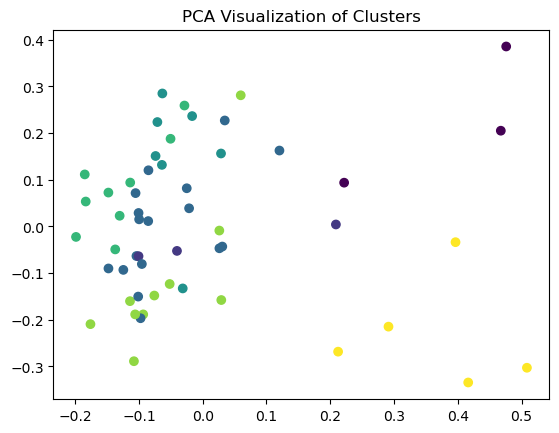

In [127]:
# Clustering using k means
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Number of clusters you've chosen
num_clusters = 7

# Create the KMeans instance
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the KMeans model to your data
kmeans.fit(tfidf_array)  # Assuming you have the TF-IDF array from the previous steps

#Cluster Centers:
cluster_centers = kmeans.cluster_centers_

#Top Words in Each Cluster:
# identify the top words with the highest TF-IDF scores within each cluster.
feature_names = vectorizer.get_feature_names_out()  # Get the original feature names from the TF-IDF vectorizer

for cluster_idx, cluster_center in enumerate(cluster_centers):
    top_indices = cluster_center.argsort()[-15:][::-1]  # Get indices of top words
    top_words = [feature_names[i] for i in top_indices]
    print(f"Cluster {cluster_idx}: Top Words: {', '.join(top_words)}")

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_array)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_)
plt.title("PCA Visualization of Clusters")
plt.show()

# Assign Labels:
# Assuming you have 7 clusters as per your example
cluster_labels = ["Context A", "Context B", "Context C", "Context D", "Context E", "Context F", "Context G"]
#Generate Labeled Data:
labeled_data = []  # List to hold labeled data

for sentence, cluster_idx in zip(example_contexts, kmeans.labels_):
    labeled_data.append((sentence, cluster_labels[cluster_idx]))

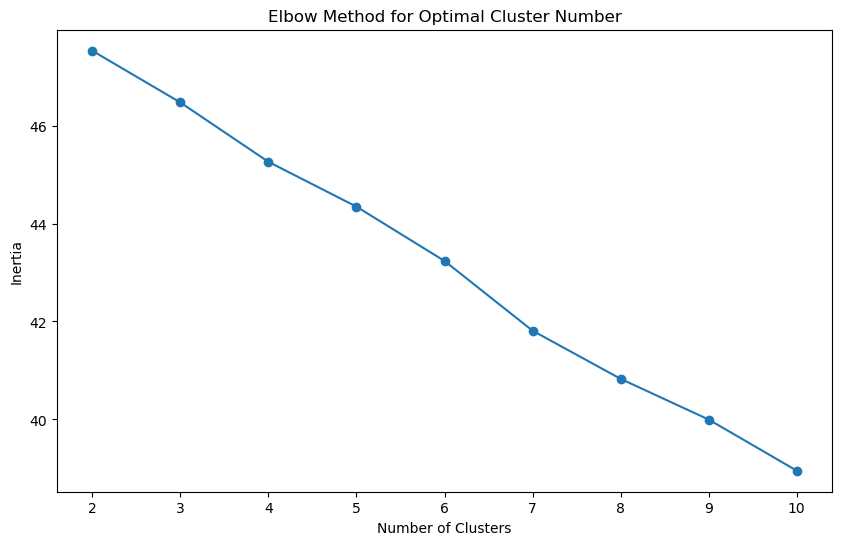

In [130]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare your data
tfidf_array = tfidf_array 

# Determine a range of cluster numbers to try
min_clusters = 2
max_clusters = 10
inertia_values = []

for n_clusters in range(min_clusters, max_clusters + 1):
    # Create and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(tfidf_array)
    
    # Get the inertia value and store it
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(min_clusters, max_clusters + 1))
plt.show()


We can not observe a clear elbow point in the plot, it could be due to a few reasons:

**Data Complexity:** If your data is highly complex or noisy, it might not exhibit a clear elbow point. In such cases, the curve might show a gradual decrease without a distinct bend.

**Small Differences in Inertia:** If the differences in inertia values between successive numbers of clusters are small, the curve might not show a noticeable elbow.

**Overlapping Clusters:** If your clusters overlap significantly or if there's a lot of similarity between different groups of sentences, it can be challenging to find a clear separation in the inertia values.

**Subjectivity:** Determining an elbow point can sometimes be subjective. Different analysts might interpret the curve differently.

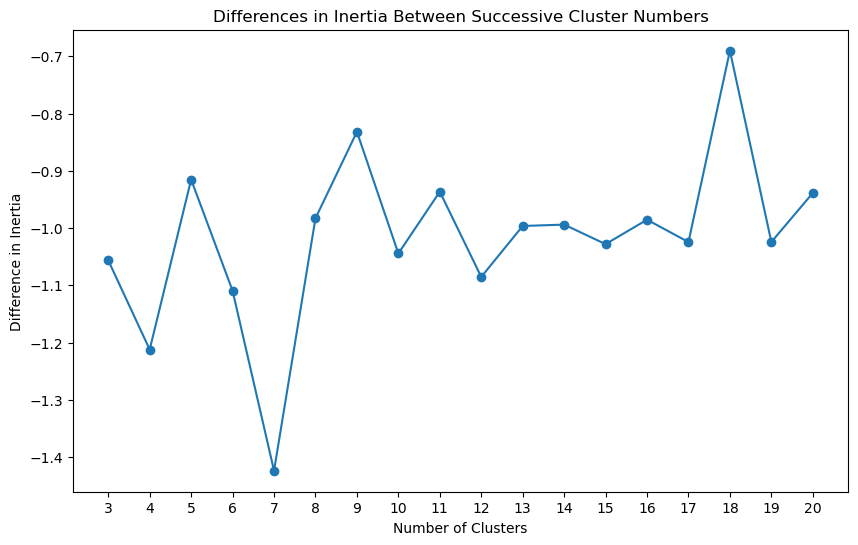

In [131]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Prepare your data
tfidf_array = tfidf_array

# Determine a range of cluster numbers to try
min_clusters = 2
max_clusters = 20
inertia_values = []

for n_clusters in range(min_clusters, max_clusters + 1):
    # Create and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(tfidf_array)
    
    # Get the inertia value and store it
    inertia_values.append(kmeans.inertia_)

# Calculate the differences in inertia between successive cluster numbers
inertia_diffs = np.diff(inertia_values)

# Plot the differences in inertia
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters + 1, max_clusters + 1), inertia_diffs, marker='o')
plt.title('Differences in Inertia Between Successive Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Difference in Inertia')
plt.xticks(range(min_clusters + 1, max_clusters + 1))
plt.show()
